# Time Series

#### 시간의 흐름에 따른 데이터를 다룰 수 있는 쉽고, 강력하고, 효율적인 pandas의 기능.

In [1]:
import pandas as pd
import numpy as np

### Time Series 생성

In [2]:
# 2016년 10월 1일 0시 0분 기준으로 1초 단위의 500개 데이터로 series 생성
dateRange = pd.date_range('2016/10/1', periods=500, freq='S')
ts = pd.Series(range(len(dateRange)), index=dateRange)   # 0 부터 정수 생성

In [3]:
ts.head()

2016-10-01 00:00:00    0
2016-10-01 00:00:01    1
2016-10-01 00:00:02    2
2016-10-01 00:00:03    3
2016-10-01 00:00:04    4
Freq: S, dtype: int64

In [4]:
ts.tail()

2016-10-01 00:08:15    495
2016-10-01 00:08:16    496
2016-10-01 00:08:17    497
2016-10-01 00:08:18    498
2016-10-01 00:08:19    499
Freq: S, dtype: int64

In [5]:
ts_1min = ts.resample('1Min').sum()   # 1초 단위 데이터를 1분 단위 데이터로 만들기

In [6]:
ts.resample('3Min').sum()   # 3분 단위 데이터로 만들기

2016-10-01 00:00:00    16110
2016-10-01 00:03:00    48510
2016-10-01 00:06:00    60130
Freq: 3T, dtype: int64

### Time Series에서 timezone 다루기

In [7]:
dates = pd.date_range('2016/10/01 00:00', periods=90, freq='D')   # 15일
ts = pd.Series(np.random.randint(0, 100, len(dates)), dates) # 0~99까지 난수
ts.head()

2016-10-01    57
2016-10-02    23
2016-10-03     7
2016-10-04    60
2016-10-05    56
Freq: D, dtype: int32

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

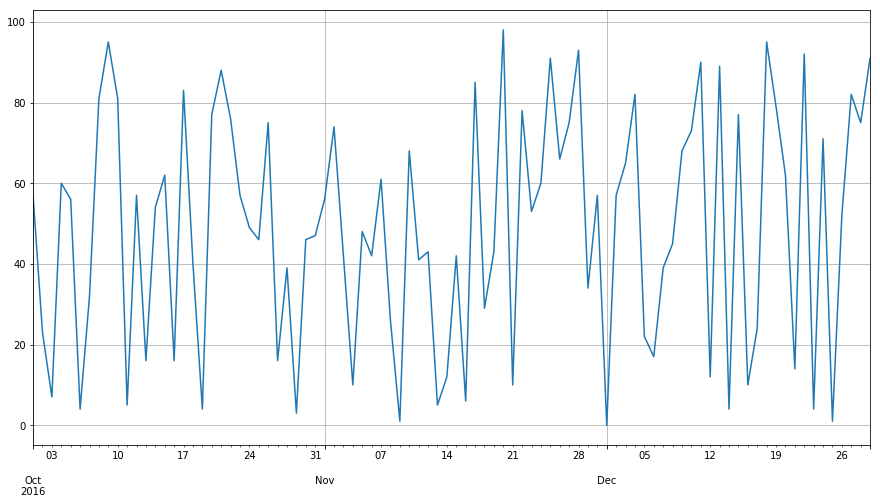

In [9]:
ts.plot(figsize=(15,8), grid=True)

In [10]:
ts_utc = ts.tz_localize('UTC')
ts_utc.head()

2016-10-01 00:00:00+00:00    57
2016-10-02 00:00:00+00:00    23
2016-10-03 00:00:00+00:00     7
2016-10-04 00:00:00+00:00    60
2016-10-05 00:00:00+00:00    56
Freq: D, dtype: int32

In [11]:
ts_utc.tz_convert('Asia/Seoul').head()   # timezone 변경

2016-10-01 09:00:00+09:00    57
2016-10-02 09:00:00+09:00    23
2016-10-03 09:00:00+09:00     7
2016-10-04 09:00:00+09:00    60
2016-10-05 09:00:00+09:00    56
Freq: D, dtype: int32

### 월 단위 time series 생성

In [12]:
months = pd.date_range('2016/10/27 00:00', periods=5, freq='M')
ts = pd.Series(range(len(months)), index=months)   # 해당 월의 마지막 날짜로 time series 생성됨
ts

2016-10-31    0
2016-11-30    1
2016-12-31    2
2017-01-31    3
2017-02-28    4
Freq: M, dtype: int64

In [13]:
ps = ts.to_period()   # 월 단위 값으로 변경
ps

2016-10    0
2016-11    1
2016-12    2
2017-01    3
2017-02    4
Freq: M, dtype: int64

In [14]:
ps.to_timestamp()   # 해당 월의 1일로 time series 변환

2016-10-01    0
2016-11-01    1
2016-12-01    2
2017-01-01    3
2017-02-01    4
Freq: MS, dtype: int64

### 분기 단위 time series 생성

In [15]:
prng = pd.period_range('2016Q1', '2017Q4', freq='Q-NOV')
ts = pd.Series(range(len(prng)), index=prng)
ts

2016Q1    0
2016Q2    1
2016Q3    2
2016Q4    3
2017Q1    4
2017Q2    5
2017Q3    6
2017Q4    7
Freq: Q-NOV, dtype: int64

In [16]:
# frequency 타입을 분기에서 날짜+시간 형태로 변경

In [17]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts

2016-03-01 09:00    0
2016-06-01 09:00    1
2016-09-01 09:00    2
2016-12-01 09:00    3
2017-03-01 09:00    4
2017-06-01 09:00    5
2017-09-01 09:00    6
2017-12-01 09:00    7
Freq: H, dtype: int64

# 범주형 데이터 Categoricals

In [18]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], 
                   "raw_grade":['a', 'b', 'b', 'a', 'a','e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [19]:
df["grade"] = df["raw_grade"].astype("category") # 범주화된 컬럼 추가
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [20]:
# 카테고리를 의미있는 이름으로 변경

In [21]:
df["grade"].cat.categories = ["Wonderful", "Good", "Ooops"]
df

,id,raw_grade,grade
0,1,a,Wonderful
1,2,b,Good
2,3,b,Good
3,4,a,Wonderful
4,5,a,Wonderful
5,6,e,Ooops


In [22]:
# 카테고리의 순서를 바꾸고, 동시에 중간에 빠진 카테고리 추가

In [23]:
df["grade"] = df["grade"].cat.set_categories(["Ooops","Bad","Medium","Good","Wonderful"])
df   # 카테고리를 추가해도 처음 설정된 카테고리는 바뀌지 않는다.

,id,raw_grade,grade
0,1,a,Wonderful
1,2,b,Good
2,3,b,Good
3,4,a,Wonderful
4,5,a,Wonderful
5,6,e,Ooops


In [24]:
df.sort_values(by="grade")   # 카테고리 순서대로 정렬

,id,raw_grade,grade
5,6,e,Ooops
1,2,b,Good
2,3,b,Good
0,1,a,Wonderful
3,4,a,Wonderful
4,5,a,Wonderful


In [25]:
df.groupby("grade").size()   # 각 카테고리 그룹에 속한 원소 갯수 집계

grade
Ooops        1
Bad          0
Medium       0
Good         2
Wonderful    3
dtype: int64